In [1]:
%pylab inline
%matplotlib notebook
import requests



Populating the interactive namespace from numpy and matplotlib


/Users/orion/anaconda2/lib/python2.7/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [2]:
from cdci_api_plugin.polar import PolarDispatcher as Polar

In [3]:
my_polar=Polar(host='10.194.169.161',port=32784)

In [4]:
my_polar.get_description()

<type 'dict'> {'query_name': 'src_query'}
<type 'dict'> {'units': 'str', 'name': 'src_name', 'value': None}
<type 'dict'> {'units': 'deg', 'name': 'RA', 'value': 0.0}
<type 'dict'> {'units': 'deg', 'name': 'DEC', 'value': 0.0}
<type 'dict'> {'units': None, 'name': 'T1', 'value': '2001-12-11T00:00:00.000'}
<type 'dict'> {'units': None, 'name': 'T2', 'value': '2001-12-11T00:00:00.000'}
<type 'dict'> {u'instrumet': u'polar'}
<type 'dict'> {'query_name': 'src_query'}
<type 'dict'> {'units': 'str', 'name': 'src_name', 'value': None}
<type 'dict'> {'units': 'deg', 'name': 'RA', 'value': 0.0}
<type 'dict'> {'units': 'deg', 'name': 'DEC', 'value': 0.0}
<type 'dict'> {'units': None, 'name': 'T1', 'value': '2001-12-11T00:00:00.000'}
<type 'dict'> {'units': None, 'name': 'T2', 'value': '2001-12-11T00:00:00.000'}
<type 'dict'> {'query_name': 'polar_parameters'}
<type 'dict'> {'units': 'str', 'name': 'user_catalog', 'value': None}
<type 'dict'> {'units': 'names_list', 'name': [], 'value': []}
<type

In [5]:
help(my_polar.get_lc)

Help on method get_lc in module cdci_api_plugin.polar:

get_lc(self, src_name='polar_test_src', time_bin=0.2, time_bin_format='sec', T1_iso='2016-12-18T08:32:21.000', T2_iso='2016-12-18T08:34:01.000', E1_keV=10.0, E2_keV=100.0) method of cdci_api_plugin.polar.PolarDispatcher instance
    :param src_name: name of the source
    :param time_bin: delta t
    :param time_bin_format: t units for time_bin (seconds default)
    :param T1_iso: T start in isot
    :param T2_iso: T stop in isot
    :param E1_keV: E min in keV
    :param E2_keV: E max in keV
    :return:



In [6]:
rate,time,rate_err,res=my_polar.get_lc(T1_iso='2016-12-18T08:32:21.000',T2_iso='2016-12-18T08:34:01.000',time_bin=0.1)

<IPython.core.display.Javascript object>


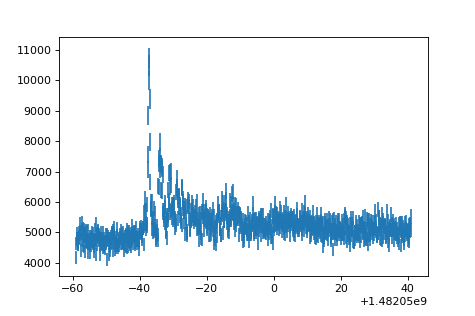

<Container object of 3 artists>

In [7]:
errorbar(time,rate,rate_err,ls="")
 

In [1]:
from cdci_api_plugin.isgri import IsgriDispatcher as Isgri
my_isgri=Isgri(host='10.194.169.161',port=32784)

In [2]:
res=my_isgri.get_lc(T2_iso='2003-03-16T00:03:12.0',query_type='Real',time_bin=50)

working remotely, please wait
exit_status, status 0
exit_status, message 
exit_status, error_message 
exit_status, debug_message 
job_monitor {u'status': u'done', u'job_id': u'-382337933013199593', u'session_id': u'DGQ0JU4E47AQER3U'}
query_status done
products [u'job_id', u'file_name', u'image', u'input_prod_list', u'session_id', u'download_file_name', u'analysis_paramters', u'data', u'prod_process_message', u'name']


('name', u'GX 349+2', 0)
('name', u'GX 1+4', 1)
('name', u'OAO 1657-415', 2)
('name', u'GX 354-0', 3)
('name', u'4U 1700-377', 4)
('name', u'4U 1722-30', 5)


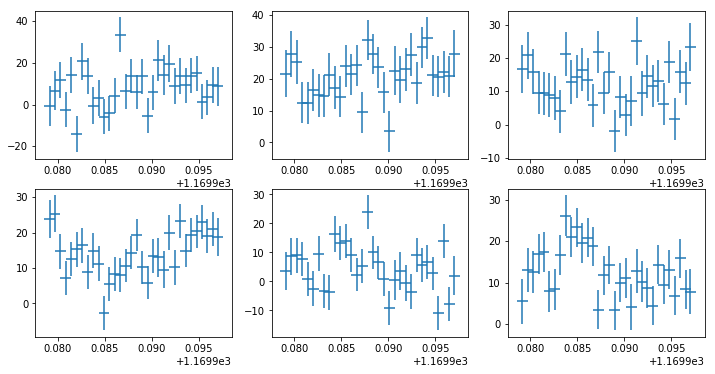

In [17]:
fig = plt.figure(figsize=(12,6))

for ID,_r in enumerate(res):
    ax=plt.subplot('23%d'%ID)
    print ('name',_r['name'],ID)    
    plt.errorbar(_r['time'],_r['rate'],_r['rate_err'],_r['time_del'],ls="")
plt.show()